In [21]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [22]:
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [23]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [24]:
type(df_skills_count)

pandas.core.series.Series

In [25]:
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [26]:
#job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

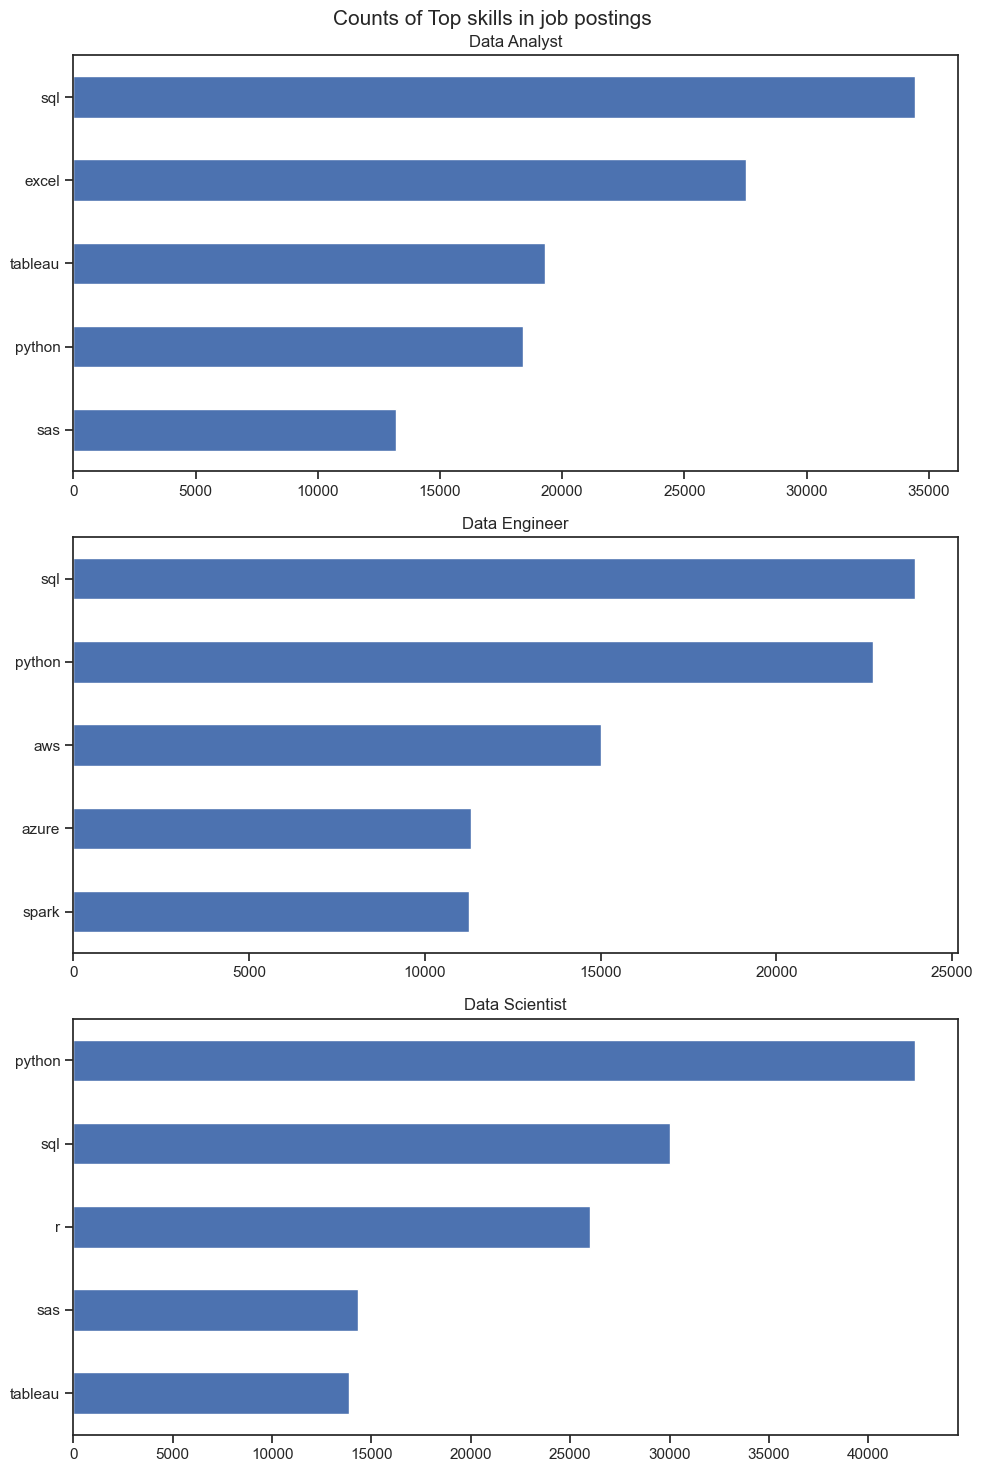

In [27]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 5 * len(job_titles)))

# Ensure ax is iterable
if len(job_titles) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top skills in job postings', fontsize=15)
plt.tight_layout()
plt.show()

In [28]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [29]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


C:\Users\INDIA\AppData\Local\Temp\ipykernel_4772\42580580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], palette='Blues')
C:\Users\INDIA\AppData\Local\Temp\ipykernel_4772\42580580.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend().set_visible(False)
C:\Users\INDIA\AppData\Local\Temp\ipykernel_4772\42580580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], palette='Blues')
C:\Users\INDIA\AppData\Local\Temp\ipykernel_4772\425805

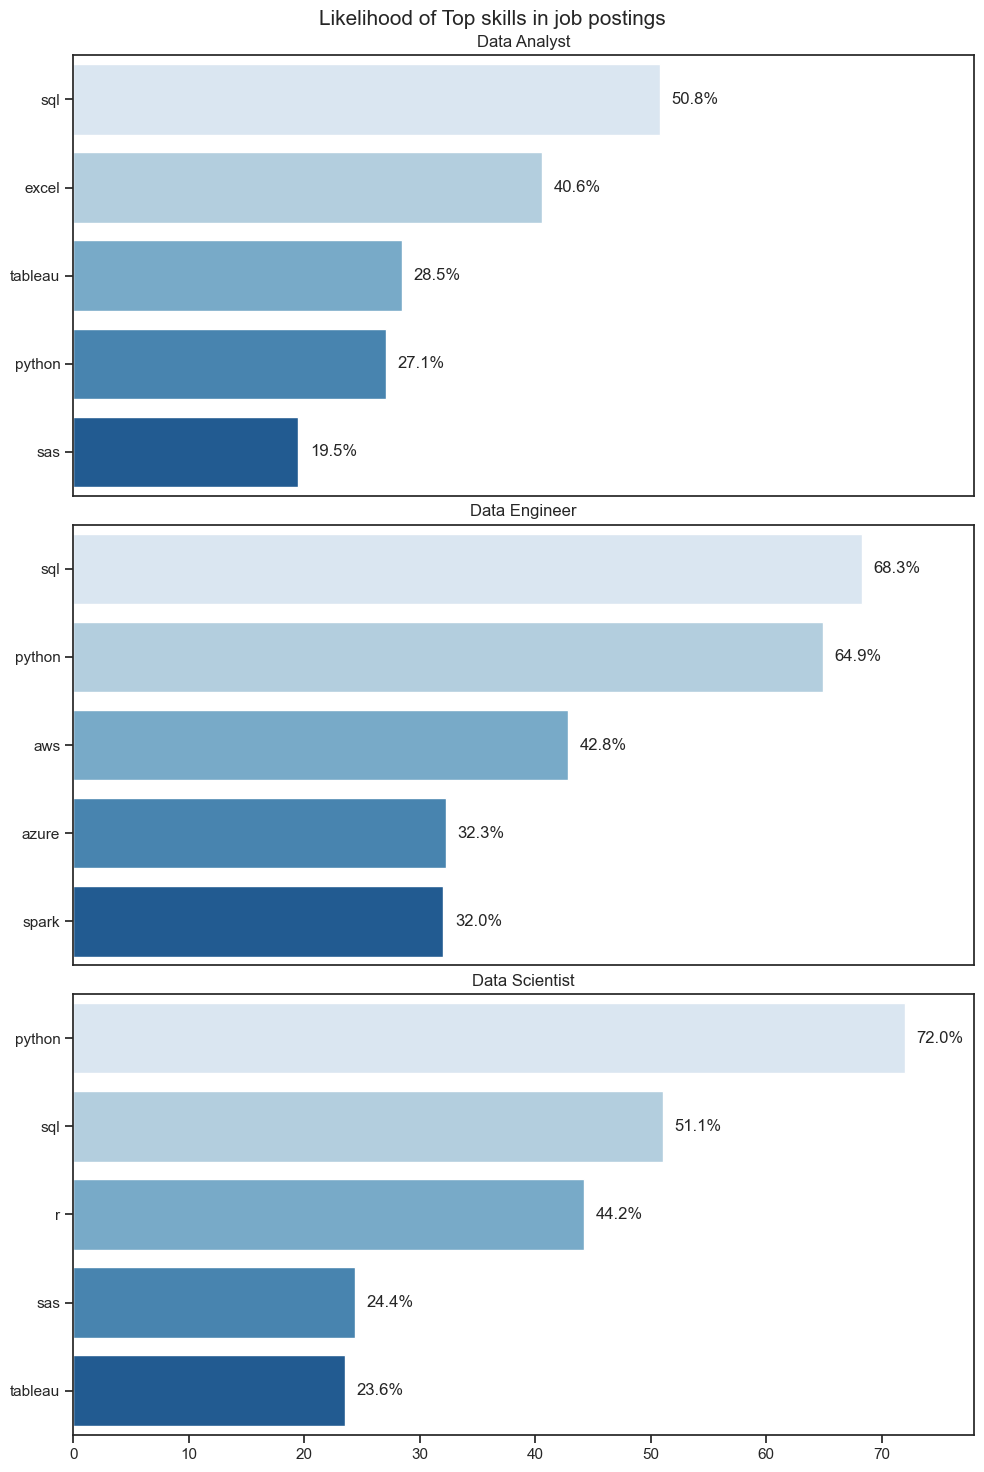

In [30]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 5 * len(job_titles)))

if len(job_titles) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)

    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], palette='Blues')

    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0, 78)
    ax[i].legend().set_visible(False)

    # ✅ This part MUST be inside the above loop:
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f"{v:.1f}%", va='center')  # shift right for visibility
    
    if i!= len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Top skills in job postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()

In [31]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month
df_DA_US_explode = df_DA_US.explode('job_skills')
df_DA_US_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,sql,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,python,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,unix,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,excel,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,databricks,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,tableau,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,excel,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7


In [32]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns = 'job_skills', aggfunc='size', fill_value=0)

df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,1,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,1,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,1,0,1,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,0,0,1,0


In [33]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

In [34]:
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis=0)
df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
5,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
6,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
7,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
8,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
9,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000


In [35]:
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent
#print(df_DA_US_percent.columns.tolist())

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000


In [36]:
df_plot = df_DA_US_percent.iloc[:, :5]

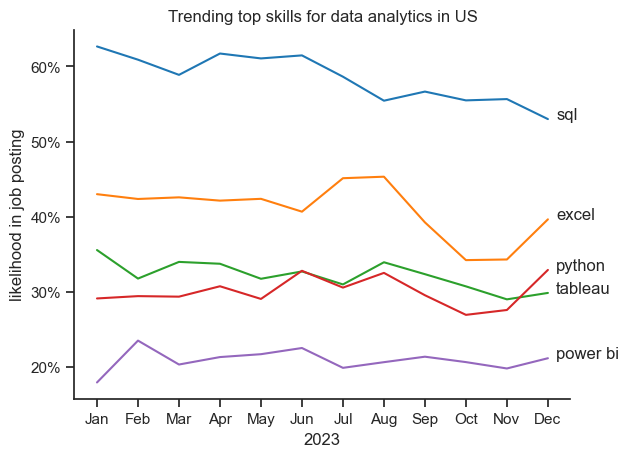

In [37]:
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending top skills for data analytics in US')
plt.ylabel('likelihood in job posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

In [38]:
df_us1 = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
job_titles1 = df_us1['job_title_short'].value_counts().index[:6].tolist()

job_titles1

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

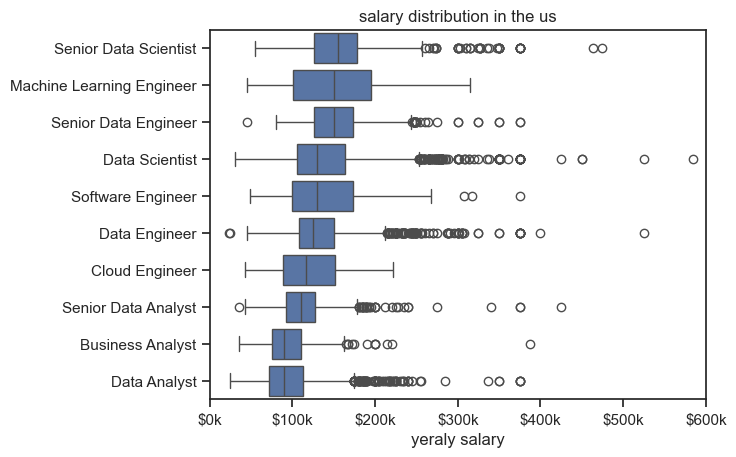

In [40]:
job_order = df_us1.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

df_us_top6 = df_us1[df_us1['job_title_short'].isin(job_titles1)]

sns.boxplot(data=df_us1, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('salary distribution in the us')
plt.xlabel('yeraly salary')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [41]:
df_DA_us2 = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_us2 = df_DA_us2.dropna(subset=['salary_year_avg'])
df_DA_us2 = df_DA_us2.explode('job_skills')

In [42]:
df_DA_us2[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [43]:
df_DA_top_pay = df_DA_us2.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [44]:
df_DA_top_pay = df_DA_top_pay.head(10)

In [45]:
df_DA_skills = df_DA_us2.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [46]:
df_DA_skills = df_DA_skills.head(10)

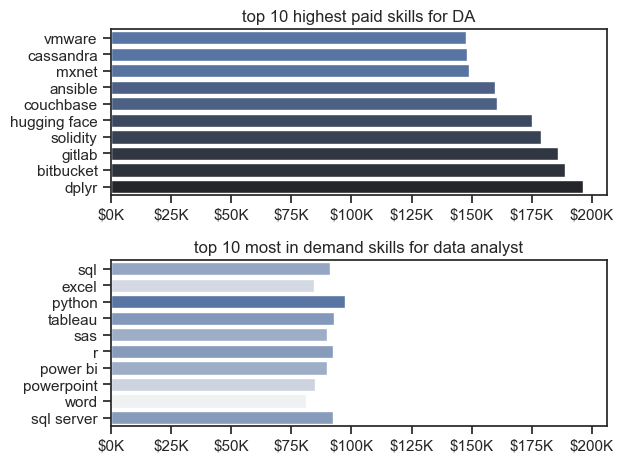

In [47]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="ticks")
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('top 10 highest paid skills for DA')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('top 10 most in demand skills for data analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

In [53]:
DA_job_count = len(df_DA_us2)
df_DA_skills

,count,median,skill percent
job_skills,,,
sql,2508,91000.00,14.380734
excel,1808,84392.00,10.366972
python,1431,97500.00,8.205275
tableau,1364,92875.00,7.821101
sas,926,90000.00,5.309633
r,893,92500.00,5.120413
power bi,838,90000.00,4.805046
powerpoint,462,85000.00,2.649083
word,461,81194.75,2.643349


In [57]:
df_DA_skills['skill_percent'] = df_DA_skills['count'] / DA_job_count * 100
df_DA_skills

,count,median,skill percent,skill_percent
job_skills,,,,
sql,2508,91000.00,14.380734,14.380734
excel,1808,84392.00,10.366972,10.366972
python,1431,97500.00,8.205275,8.205275
tableau,1364,92875.00,7.821101,7.821101
sas,926,90000.00,5.309633,5.309633
r,893,92500.00,5.120413,5.120413
power bi,838,90000.00,4.805046,4.805046
powerpoint,462,85000.00,2.649083,2.649083
word,461,81194.75,2.643349,2.643349


In [59]:
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]
df_DA_skills_high_demand

,count,median,skill percent,skill_percent
job_skills,,,,
sql,2508,91000.0,14.380734,14.380734
excel,1808,84392.0,10.366972,10.366972
python,1431,97500.0,8.205275,8.205275
tableau,1364,92875.0,7.821101,7.821101
sas,926,90000.0,5.309633,5.309633
r,893,92500.0,5.120413,5.120413


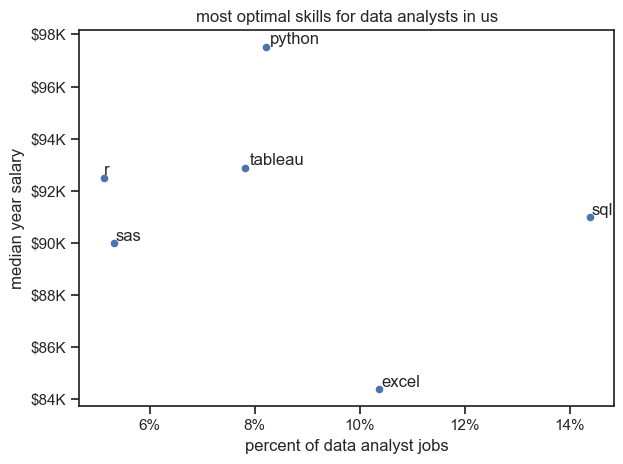

In [73]:
from adjustText import adjust_text
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median')
texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median'].iloc[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('percent of data analyst jobs')
plt.ylabel('median year salary')
plt.title('most optimal skills for data analysts in us')

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int (x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

In [76]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
 
technology_dict

{'analyst_tools': ['dax',
  'msaccess',
  'looker',
  'sas',
  'word',
  'esquisse',
  'tableau',
  'power bi',
  'datarobot',
  'spss',
  'powerbi',
  'sap',
  'visio',
  'spreadsheet',
  'sharepoint',
  'powerpoint',
  'excel',
  'cognos',
  'outlook',
  'ssrs',
  'nuix',
  'qlik',
  'alteryx',
  'sheets',
  'microstrategy',
  'ms access',
  'splunk',
  'ssis'],
 'programming': ['groovy',
  'matlab',
  'vba',
  'html',
  'vb.net',
  'c',
  'sas',
  'visual basic',
  'crystal',
  'elixir',
  'visualbasic',
  'erlang',
  'r',
  'go',
  'golang',
  'c++',
  'assembly',
  'lisp',
  'haskell',
  'no-sql',
  'solidity',
  'java',
  'javascript',
  'mongodb',
  'lua',
  'nosql',
  'shell',
  'swift',
  'julia',
  'ocaml',
  'ruby',
  'mongo',
  'fortran',
  'objective-c',
  'python',
  'f#',
  'typescript',
  'sql',
  'bash',
  'kotlin',
  't-sql',
  'perl',
  'delphi',
  'powershell',
  'dart',
  'php',
  'sass',
  'css',
  'apl',
  'scala',
  'clojure',
  'rust',
  'c#',
  'pascal',
  'co

In [78]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,dax
0,analyst_tools,msaccess
0,analyst_tools,looker
0,analyst_tools,sas
0,analyst_tools,word
...,...,...
9,sync,webex
9,sync,google chat
9,sync,ringcentral
9,sync,zoom


In [80]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on = 'job_skills', right_on='skills')

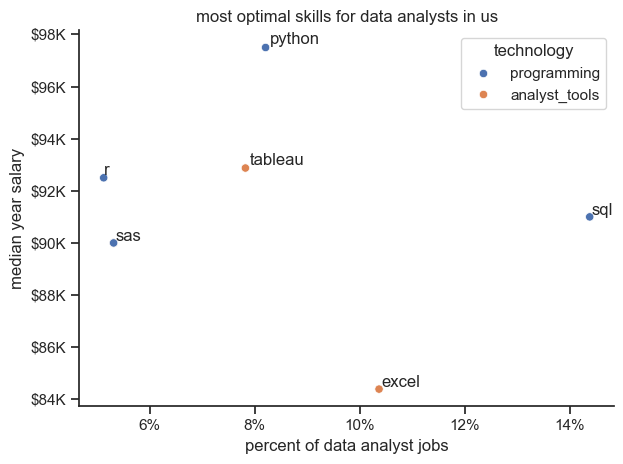

In [82]:
sns.scatterplot(data= df_plot, x= 'skill_percent', y='median', hue='technology')

sns.despine()
sns.set_theme(style='ticks')

texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median'].iloc[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('percent of data analyst jobs')
plt.ylabel('median year salary')
plt.title('most optimal skills for data analysts in us')

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int (x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()